# Challenge: Data Cleaning & Validation

In [55]:
#Imports
import numpy as np
import pandas as pd
pd.options.display.max_rows = 999
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(open('WELLCOME_APCspend2013_forThinkful.csv','rU'), encoding='utf8', engine='c')
#data = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding='latin')
data.head()

/Users/brandyn/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


,PMID/PMCID,Publisher,Journal title,Article title,COST
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID       1928 non-null object
Publisher        2127 non-null object
Journal title    2126 non-null object
Article title    2127 non-null object
COST             2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


### Determine the five most common journals and total articles for each

In [4]:
#Pre-Data Clearning
data['Journal title'].value_counts().head(10)

PLoS One                                           92
PLoS ONE                                           62
Journal of Biological Chemistry                    48
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19
PLoS Neglected Tropical Diseases                   18
Human Molecular Genetics                           18
Nature Communications                              17
PLoS Genetics                                      15
Neuroimage                                         15
Name: Journal title, dtype: int64

In [5]:
#Apply cleaning scripts
data['Journal title'] = data['Journal title'].str.upper()
data['Journal title'] = data['Journal title'].str.replace(',','')
data['Journal title'] = data['Journal title'].str.replace(':','')
data['Journal title'] = data['Journal title'].str.replace('.','')
data['Journal title'] = data['Journal title'].str.replace('&','AND')
data['Journal title'] = data['Journal title'].str.replace('BEHAVIOUR','BEHAVIOR')
data['Journal title'] = data['Journal title'].str.replace('BIOCHEMICAL','BIOCHEM')
data['Journal title'] = data['Journal title'].str.replace('JOURNALS','JOURNAL')
data['Journal title'] = data['Journal title'].str.replace('TROP MED INT HEALTH','TROPICAL MEDICINE AND INTERNATIONAL HEALTH')
data['Journal title'] = data['Journal title'].str.replace('NEUROSCIENCES','NEUROSCIENCE')
data['Journal title'] = data['Journal title'].str.replace('THE JOURNAL','JOURNAL')

data['Journal title'] = data['Journal title'].str.strip()

In [51]:
#Used the sort index to scroll through to look at the data to clean it. Also created a new dataframe
new_df = pd.DataFrame(data['Journal title'].value_counts())
new_df.columns=['Count']
#Typically wouldnt limit it, but added head() for viewing purposes.
new_df.sort_index().head(15)


,Count
ACADEMY OF NUTRITION AND DIETETICS,1
ACS CHEMICAL BIOLOGY,5
ACS CHEMICAL NEUROSCIENCE,1
ACS NANO,2
ACTA CRYSTALLOGRAPHICA SECTION D,1
ACTA CRYSTALLOGRAPHICA SECTION D BIOLOGICAL CRYSTALLOGRAPHY,1
ACTA CRYSTALLOGRAPHICA SECTION D BIOLOGICAL CRYSTALLOGRAPHY,1
ACTA CRYSTALLOGRAPHICA SECTION F STRUCTURAL BIOLOGY AND CRYSTALLIZATION COMMUNICATIONS,2
ACTA CRYSTALLOGRAPHY D,1
ACTA D,1


In [8]:
#Top five journals after cleaning
new_df.head(5)

,Count
PLOS ONE,190
JOURNAL OF BIOLOGICAL CHEMISTRY,60
NEUROIMAGE,29
NUCLEIC ACIDS RESEARCH,26
PLOS GENETICS,24


### Determing the mean, median, and Std

In [52]:
#In order to perform mathematical calculations have to remove items and convert to a float.
data['FCOST'] = data['COST'].str.replace('£','')
data['FCOST'] = data['FCOST'].str.replace('$','')
data['FCOST'] = data['FCOST'].apply(lambda x: float(x))

In [53]:
data.head(5)

,PMID/PMCID,Publisher,Journal title,Article title,COST,FCOST
0,NaN,CUP,PSYCHOLOGICAL MEDICINE,Reduced parahippocampal cortical thickness in ...,£0.00,0.00
1,PMC3679557,ACS,BIOMACROMOLECULES,Structural characterization of a Model Gram-ne...,£2381.04,2381.04
2,23043264 PMC3506128,ACS,J MED CHEM,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,642.56
3,23438330 PMC3646402,ACS,J MED CHEM,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,669.64
4,23438216 PMC3601604,ACS,J ORG CHEM,Regioselective opening of myo-inositol orthoes...,£685.88,685.88


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 6 columns):
PMID/PMCID       1928 non-null object
Publisher        2127 non-null object
Journal title    2126 non-null object
Article title    2127 non-null object
COST             2127 non-null object
FCOST            2127 non-null float64
dtypes: float64(1), object(5)
memory usage: 99.8+ KB


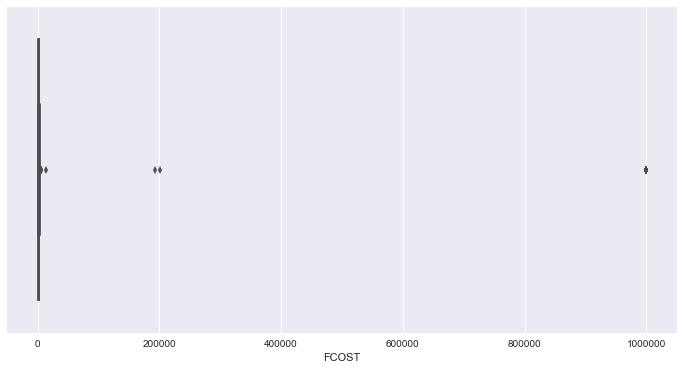

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data['FCOST'])

In [24]:
data[data['FCOST']>5000].count()['FCOST']

52

In [57]:
#There are some outliers, so lets create a dataframe with those dropped. 
outliers_removed = data[data['FCOST']<5000]

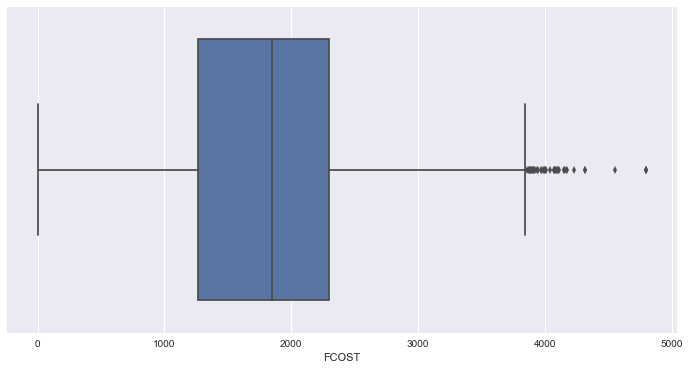

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(outliers_removed['FCOST'])

Can do some more work to remove the outliers if needed. 

In [28]:
#Mean
print('Mean with outliers: ' + str(data['FCOST'].mean()))
print('Mean without outliers: ' + str(outliers_removed['FCOST'].mean()))

Mean with outliers: 24067.33997179131
Mean without outliers: 1818.144636144582


In [29]:
#Median
print('Median with outliers: ' + str(data['FCOST'].median()))
print('Median without outliers: ' + str(outliers_removed['FCOST'].median()))

Median with outliers: 1884.01
Median without outliers: 1851.15


In [30]:
#STD
print('STD with outliers: ' + str(data['FCOST'].std()))
print('STD without outliers: ' + str(outliers_removed['FCOST'].std()))

STD with outliers: 146860.6655590476
STD without outliers: 757.641628388014


## Challenge

In [51]:
#Didnt attempt challenge. Its kind of vague.
data['Journal title'].value_counts()

PLoS One                                                                92
PLoS ONE                                                                62
Journal of Biological Chemistry                                         48
Nucleic Acids Research                                                  21
Proceedings of the National Academy of Sciences                         19
PLoS Neglected Tropical Diseases                                        18
Human Molecular Genetics                                                18
Nature Communications                                                   17
Neuroimage                                                              15
PLoS Genetics                                                           15
PLoS Pathogens                                                          15
BMC Public Health                                                       14
PLOS ONE                                                                14
NeuroImage               

In [ ]:
#What is meant by subject?
